In [1]:
import pandas as pd
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt

In [9]:

# Load GTFS Data
routes_df = pd.read_csv('routes.csv')
trips_df = pd.read_csv('trips.txt')
stops_df=pd.read_csv('stops2.txt')
stop_times_df=pd.read_csv('stop_times2.txt')

In [10]:

# Preprocess Data
G = nx.Graph()


In [29]:

# Add nodes for each stop
for idx, row in stops_df.iterrows():
    G.add_node(row['stop_id'], pos=(row['stop_lon'], row['stop_lat']))


In [30]:
for idx, row in stop_times_df.iterrows():
    stop_sequence = row['stop_sequence']
    stop_ids = [row['stop_id']]
    while stop_sequence > 1:
        stop_sequence -= 1
        prev_stop_id_df = stop_times_df[(stop_times_df['trip_id'] == row['trip_id']) & 
                                        (stop_times_df['stop_sequence'] == stop_sequence)]
        if prev_stop_id_df.empty:
            # No previous stop found, break the loop
            break
        prev_stop_id = prev_stop_id_df['stop_id'].values[0]
        stop_ids.append(prev_stop_id)
    for i in range(len(stop_ids) - 1):
        G.add_edge(stop_ids[i], stop_ids[i + 1])


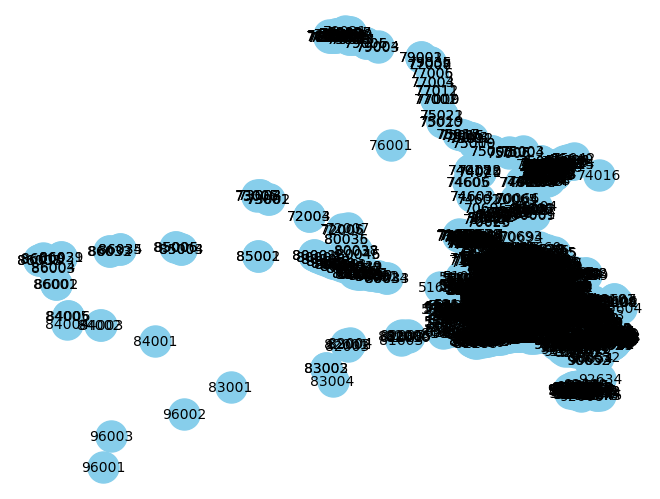

In [31]:

# Draw the nodes and edges
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black', edge_color='black', width=1)

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


In [32]:
import math
 
# Coordinates of Doha city center
my_lat =25.286514
my_lon =51.511798

In [33]:

# Calculate the distance between two points using the Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) * math.sin(dlon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

In [34]:


# Find the nearest stop to the city center of Doha
min_distance = float('inf')
nearest_stop_id = None
for idx, row in stops_df.iterrows():
    distance = haversine(my_lat, my_lon, row['stop_lat'], row['stop_lon'])
    if distance < min_distance:
        min_distance = distance
        nearest_stop_id = row['stop_id']
        nearest_stop_name = row['stop_name']
origin_stop_id = nearest_stop_id
print(f"The nearest stop to your location is '{nearest_stop_name}' with a distance of {min_distance} km.")

The nearest stop to your location is 'Aseer Street FEREEJ BIN MAHMOUD' with a distance of 0.052142558696141594 km.


In [35]:

dest_lat = 25.3718
dest_lon =  51.5252

# Find the nearest stop to the city center of Doha
min_distance = float('inf')
nearest_stop_id_dest = None
for idx, row in stops_df.iterrows():
    distance = haversine(dest_lat, dest_lon, row['stop_lat'], row['stop_lon'])
    if distance < min_distance:
        min_distance = distance
        nearest_stop_id_dest = row['stop_id']
        nearest_stop_name_dest = row['stop_name']
dest_stop_id = nearest_stop_id_dest
print(f"The nearest stop to your location is '{nearest_stop_name_dest}' with a distance of {min_distance} km.")

The nearest stop to your location is 'Legtaifiya Metro Station Ent 1' with a distance of 0.1269860370774186 km.


In [36]:
# Calculate Shortest Paths
paths = nx.all_shortest_paths(G, source=nearest_stop_id , target=nearest_stop_id_dest)



In [38]:

# Convert the shortest paths from stop IDs to stop names
shortest_path_names = []
shortest_paths = []
for path in paths:
    shortest_path_names.append([stops2_df.loc[stop_id, 'stop_name'] for stop_id in path])
    shortest_paths.append(path)

# Print the shortest paths
print("Shortest Path Names:")
for path_names in shortest_path_names:
    print(path_names)
print("Shortest Paths:")
print(shortest_paths)

NetworkXNoPath: Target 66131 cannot be reached from given sources

In [40]:
print("Nodes in the graph:")
print(list(G.nodes))


Nodes in the graph:
[57609, 4000, 31604, 31606, 51634, 12500, 54613, 63601, 51122, 31607, 33601, 61602, 61610, 65602, 31601, 56759, 56624, 56614, 56612, 53112, 55526, 55128, 55531, 55535, 57691, 57664, 53107, 56698, 56773, 56120, 56619, 55656, 56101, 38012, 38014, 38022, 38017, 38011, 38009, 42023, 40001, 40004, 51632, 55635, 55216, 55664, 43603, 45606, 70156, 70710, 67116, 60102, 40005, 40008, 40009, 68118, 52601, 51646, 27026, 90607, 91611, 90048, 55223, 55189, 56653, 56662, 56126, 56785, 55188, 55186, 66108, 66130, 66126, 66103, 53610, 55621, 31614, 45062, 45065, 45069, 45070, 57170, 53626, 53632, 57162, 55612, 56769, 56643, 56641, 38605, 56745, 56684, 68605, 30606, 96001, 96003, 82007, 85005, 80018, 80020, 80030, 56751, 56744, 81627, 47001, 47003, 47013, 47027, 47012, 81611, 57157, 57152, 57150, 83004, 57712, 81107, 47025, 56761, 56638, 91602, 57720, 56007, 56692, 56680, 56672, 56670, 44601, 41603, 56006, 56009, 56014, 57143, 57706, 45009, 84003, 57114, 55638, 42501, 41006, 42008, 

In [39]:
G.has_node("66131")

False

In [41]:
nx.is_connected(G)

False

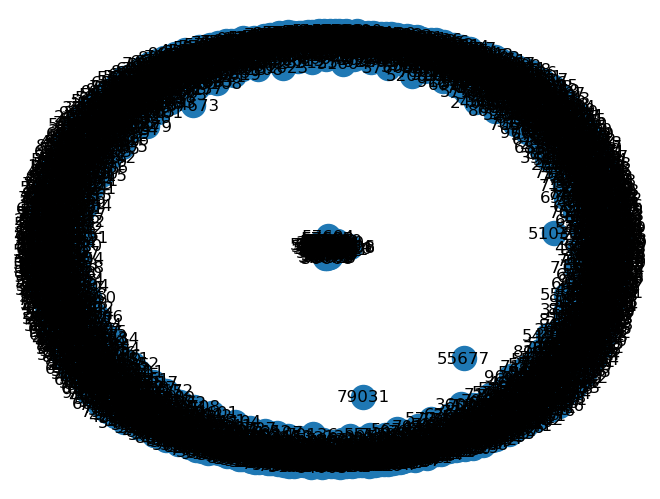

In [43]:

# Find the connected components in the graph
components = list(nx.connected_components(G))

# If there are multiple components, connect them
if len(components) > 1:
    # Find the nodes that connect the components
    connecting_nodes = []
    for component in components:
        for node in component:
            neighbors = set(G.neighbors(node))
            if any(node not in component for component in components for node in neighbors):
                connecting_nodes.append(node)

    # Add edges between the connecting nodes
    for i in range(len(connecting_nodes) - 1):
        G.add_edge(connecting_nodes[i], connecting_nodes[i + 1])

# Visualize the connected graph
nx.draw(G, with_labels=True)
plt.show()

In [ ]:
print(origin_stop_id)

row 2098 remove the rest after it in stop times 2

In [ ]:
print(dest_stop_id)

In [ ]:


# Extract the stop names corresponding to the stop IDs
shortest_path_names = [G.nodes[stop_id]['name'] for stop_id in paths]

print("Shortest Path:", shortest_path_names)

In [ ]:


# Get the list of stops for each shortest path
shortest_paths_stops = []
for path in paths:
    stops = [stops_df.loc[stop_id, 'stop_name'] for stop_id in path]
    shortest_paths_stops.append(stops)


In [ ]:

# Print the list of stops for each shortest path
print("List of Stops for Each Shortest Path:")
for i, stops in enumerate(shortest_paths_stops, start=1):
    print(f"Path {i}: {stops}")

In [ ]:
# Check if a path exists between the origin_stop_id and dest_stop_id
if nx.has_path(G, origin_stop_id, dest_stop_id):
    # Calculate the shortest paths
    paths = nx.all_shortest_paths(G, source=origin_stop_id, target=dest_stop_id)
    # Convert the shortest paths from stop IDs to stop names
    for path in paths:
        shortest_path_names.append([stops2_df.loc[stop_id, 'stop_name'] for stop_id in path])
        shortest_paths.append(path)
    # Print the shortest paths
    print("Shortest Path Names:")
    for path_names in shortest_path_names:
        print(path_names)
    print("Shortest Paths:")
    print(shortest_paths)
else:
    print(f"No path exists between {origin_stop_id} and {dest_stop_id} in the graph G.")



In [ ]:
from datetime import datetime, timedelta
import pytz  # Import the pytz library for handling time zones

# Function to calculate the travel time between stops
def calculate_travel_time(path):
    travel_time = 0
    for i in range(len(path) - 1):
        # Get the current stop and the next stop in the path
        current_stop = path[i]
        next_stop = path[i + 1]
        
        # Get the travel time between the current stop and the next stop
        edge_data = G[current_stop][next_stop]
        
        # Check if the edge data contains a 'weight' attribute
        if 'weight' in edge_data:
            travel_time += edge_data['weight']
        else:
            # If 'weight' attribute is missing, assign a default value (e.g., 0)
            travel_time += 0  # Replace 0 with the default value you want
        
    return travel_time

# Load the stops.txt file into a DataFrame
stops_df = pd.read_csv('stops.txt')

# Set the stop_id as the index of the DataFrame
stops_df.set_index('stop_id', inplace=True)

# Convert the shortest paths from stop IDs to stop names
shortest_paths = []
for path in paths:
    shortest_path_names = [stops2_df.loc[stop_id, 'stop_name'] for stop_id in path]
    shortest_paths.append(shortest_path_names)

# Calculate the total travel time for the shortest path
total_travel_time = calculate_travel_time(shortest_paths)

# Get the current time in the local time zone of the GTFS data
current_time = datetime.now(pytz.timezone('Asia/Qatar'))

# Calculate the estimated time of arrival
estimated_time_of_arrival = current_time + timedelta(seconds=total_travel_time)
# Convert the estimated time of arrival to a string with the desired format
estimated_time_of_arrival_str = estimated_time_of_arrival.strftime("%H:%M:%S")

print("Estimated Time of Arrival:", estimated_time_of_arrival_str)




In [ ]:
# Calculate A* Search for Optimal Path
origin_stop_id = nearest_stop_id
dest_stop_id = nearest_stop_dest

# Define a function to calculate the heuristic (estimated time to reach the destination)
def heuristic(stop_id):
    # Calculate the estimated distance using the haversine formula
    return haversine(stops2_df.loc[stop_id, 'stop_lat'], stops2_df.loc[stop_id, 'stop_lon'], 
                     stops2_df.loc[dest_stop_id, 'stop_lat'], stops2_df.loc[dest_stop_id, 'stop_lon'])

# Define a function to calculate the cost (time delay) from stop1 to stop2
def cost(stop1, stop2):
    # Calculate the distance using the haversine formula
    distance = haversine(stops2_df.loc[stop1, 'stop_lat'], stops2_df.loc[stop1, 'stop_lon'], 
                         stops2_df.loc[stop2, 'stop_lat'], stops2_df.loc[stop2, 'stop_lon'])
    # Calculate the time delay based on the average speed of the transportation
    time_delay = distance / average_speed_of_transportation
    return time_delay

# Define a function to get the neighbors of a stop
def get_neighbors(stop_id):
    return list(G.neighbors(stop_id))

# Define a function to calculate the total cost (time delay) from the origin to the destination
def total_cost(path):
    total_time_delay = 0
    for i in range(len(path) - 1):
        total_time_delay += cost(path[i], path[i+1])
    return total_time_delay

# Define a function to calculate the f-value (priority) for A* search
def f_value(stop_id, g_value):
    return g_value + heuristic(stop_id)

# Initialize the A* search
open_set = [(origin_stop_id, 0)]
closed_set = []
g_values = {origin_stop_id: 0}
parents = {}

# Perform A* search
while open_set:
    current_stop_id, current_g_value = min(open_set, key=lambda x: f_value(x[0], g_values[x[0]]))
    open_set.remove((current_stop_id, current_g_value))
    closed_set.append(current_stop_id)
    if current_stop_id == dest_stop_id:
        break
    for neighbor_stop_id in get_neighbors(current_stop_id):
        if neighbor_stop_id in closed_set:
            continue
        tentative_g_value = current_g_value + cost(current_stop_id, neighbor_stop_id)
        if neighbor_stop_id not in open_set or tentative_g_value < g_values[neighbor_stop_id]:
            g_values[neighbor_stop_id] = tentative_g_value
            parents[neighbor_stop_id] = current_stop_id
            open_set.append((neighbor_stop_id, tentative_g_value))

# Reconstruct the optimal path
optimal_path = [dest_stop_id]
while optimal_path[-1] != origin_stop_id:
    optimal_path.append(parents[optimal_path[-1]])
optimal_path.reverse()

# Calculate the total time delay for the optimal path
total_time_delay = total_cost(optimal_path)

# Print the optimal path and the total time delay
print("Optimal Path:", optimal_path)
print("Total Time Delay:", total_time_delay)
